<h1> House Prices #1 <span class="tocSkip"></span></h1>


<h2> Introduction <span class="tocSkip"></span></h2>

This  Notebook kernel contains the Data Cleaning and EDA of the dataset in preparation for regression and classification machine learning algorithms to predict house prices of residential homes in Ames, Iowa.

<h2> Business Case <span class="tocSkip"></span></h2>

AmesHouse Real State is a real estate company located in Ames (USA) which has a team of professionals interested in improving their business model. For now, they use classic market analysis methods using different factors to try to predict the price of the housing market in their area. Their analysis methods are complete, but they have the impression that they are missing some variable.
To complement and improve their predictions, AmesHouse Real State has contacted us because they are interested in having a powerful and accurate method to predict the price of houses located in that city.

> Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraties-and-the-dataset" data-toc-modified-id="Load-the-libraties-and-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraties and the dataset</a></span></li><li><span><a href="#Clean-the-data" data-toc-modified-id="Clean-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean the data</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#NaN-values" data-toc-modified-id="NaN-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>NaN values</a></span></li><li><span><a href="#Dropping-columns" data-toc-modified-id="Dropping-columns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dropping columns</a></span></li><li><span><a href="#Filling-NaN-values:" data-toc-modified-id="Filling-NaN-values:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Filling NaN values:</a></span></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Categorical-and-Numerical-Variables" data-toc-modified-id="Categorical-and-Numerical-Variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical and Numerical Variables</a></span><ul class="toc-item"><li><span><a href="#Categorical-Variables:" data-toc-modified-id="Categorical-Variables:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Categorical Variables:</a></span></li><li><span><a href="#Numerical-data:" data-toc-modified-id="Numerical-data:-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Numerical data:</a></span></li></ul></li><li><span><a href="#Outliers:" data-toc-modified-id="Outliers:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outliers:</a></span></li><li><span><a href="#EDA-of-YEAR-variables" data-toc-modified-id="EDA-of-YEAR-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>EDA of YEAR variables</a></span></li></ul></li><li><span><a href="#Encoding-the-categorical-variables:" data-toc-modified-id="Encoding-the-categorical-variables:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoding the categorical variables:</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Importance</a></span><ul class="toc-item"><li><span><a href="#Plotting-feature-importance:" data-toc-modified-id="Plotting-feature-importance:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plotting feature importance:</a></span></li></ul></li></ul></div>

**Key info about the dataset:**

- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` $Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

**Steps to perform in the excercise (Data Mining + Feature Engineering)**
* Inital EDA
* Deal with missing values
* Transform to logarithmic scale non-normal distributions
* Scaling continuous features
* Dumify categorical features

# Load the libraties and the dataset 

In [1]:
# Adding the libraries and reading data

#Import common modules

import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
plt.rcParams['figure.dpi'] = 300

# Load libraries
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import os


from IPython.display import display
from sklearn.model_selection import train_test_split
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"../../datasets/Students_turn/Ex3.0.Data_to_clean.csv", index_col=0)

In [4]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

Let's explore a little bit!

# Clean the data

## Missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

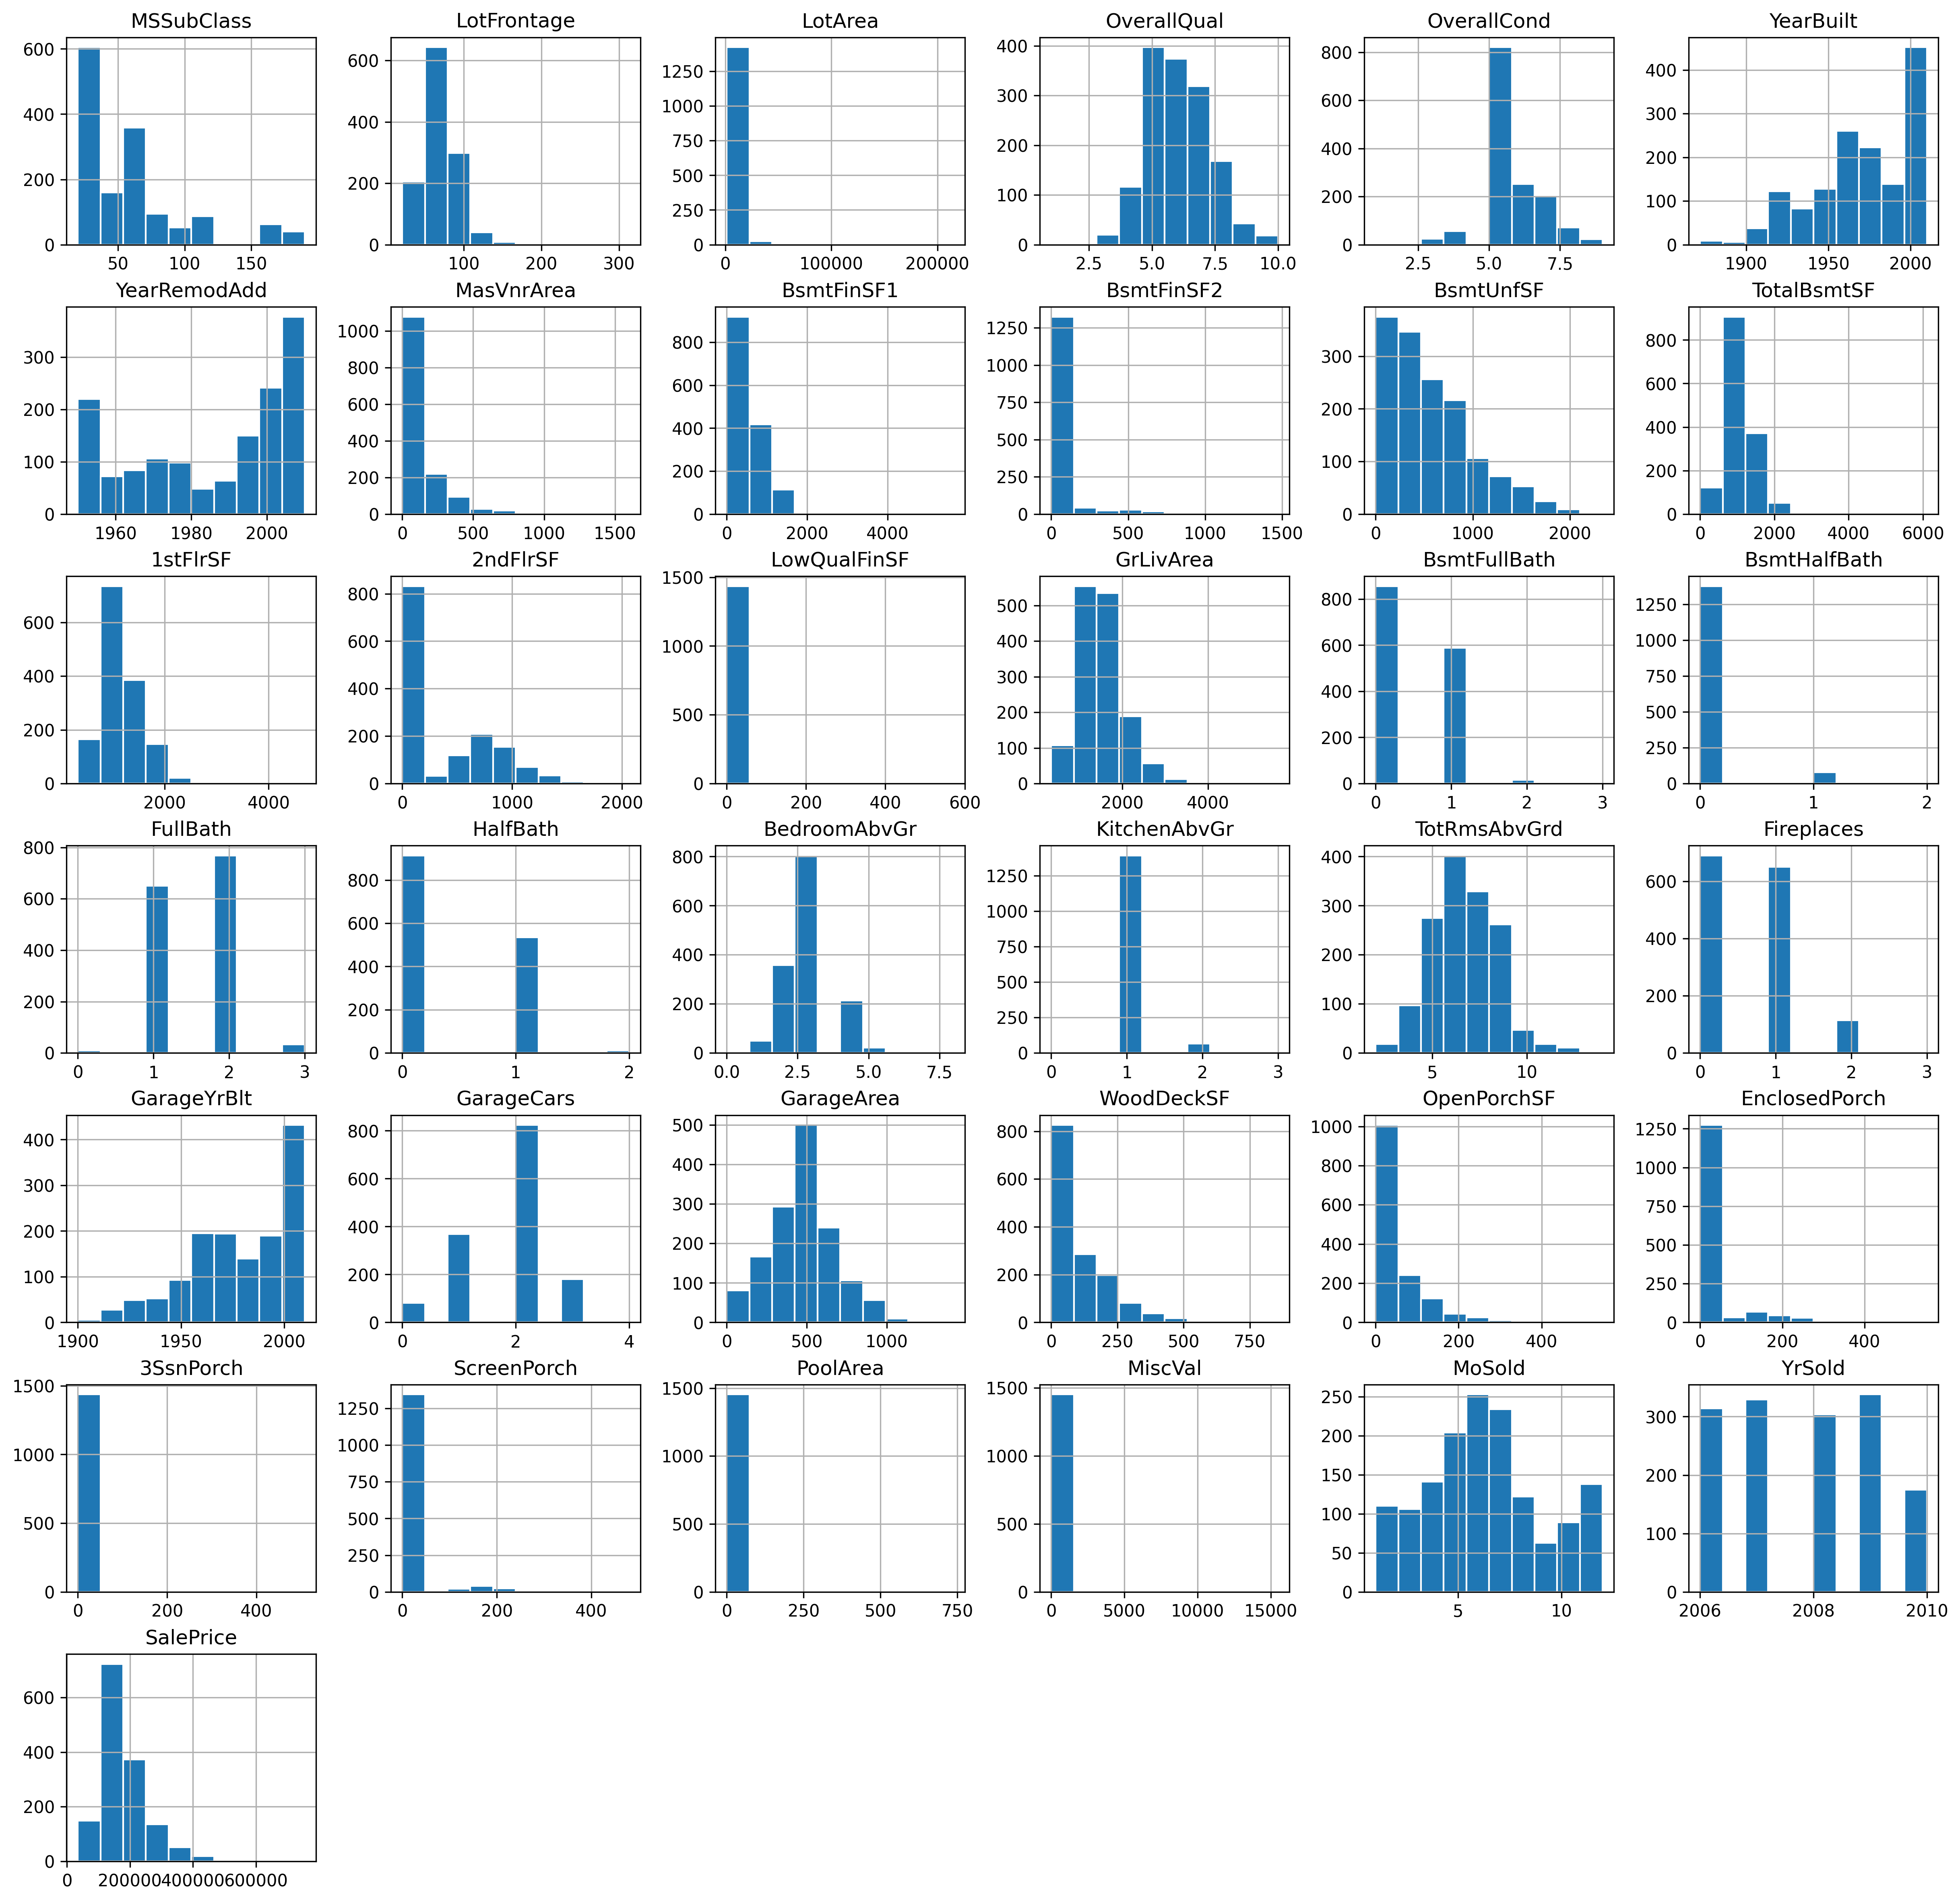

In [6]:
df.hist(edgecolor='white', figsize=(20, 20));

The histograms show that some of the variables have the majority of the outputs in one value. It might be helpful when deciding on dropping some columns

In [7]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.head().T

Id                  1       2       3        4       5
MSSubClass         60      20      60       70      60
MSZoning           RL      RL      RL       RL      RL
LotFrontage      65.0    80.0    68.0     60.0    84.0
LotArea          8450    9600   11250     9550   14260
Street           Pave    Pave    Pave     Pave    Pave
...               ...     ...     ...      ...     ...
MoSold              2       5       9        2      12
YrSold           2008    2007    2008     2006    2008
SaleType           WD      WD      WD       WD      WD
SaleCondition  Normal  Normal  Normal  Abnorml  Normal
SalePrice      208500  181500  223500   140000  250000

[80 rows x 5 columns]

In [10]:
import sys
sys.path.insert(0, '/Users/agieen/Downloads/AllWomen/_functions_')

from My_functions_EDA import *
from functions_plot_EDA import *
from fx_MLClassification import *



## NaN values

In [11]:
#Calculating the percentage of the NaN values:

null = percentage_nullValues(df)
pd.set_option('display.max_rows', None)
null

Percentage_NaN
PoolQC                   99.5
MiscFeature              96.3
Alley                    93.8
Fence                    80.8
FireplaceQu              47.3
LotFrontage              17.7
GarageYrBlt               5.5
GarageCond                5.5
GarageType                5.5
GarageFinish              5.5
GarageQual                5.5
BsmtExposure              2.6
BsmtFinType2              2.6
BsmtCond                  2.5
BsmtQual                  2.5
BsmtFinType1              2.5
MasVnrArea                0.5
MasVnrType                0.5
Electrical                0.1
MSSubClass                0.0
Fireplaces                0.0
Functional                0.0
KitchenQual               0.0
KitchenAbvGr              0.0
BedroomAbvGr              0.0
HalfBath                  0.0
FullBath                  0.0
BsmtHalfBath              0.0
TotRmsAbvGrd              0.0
GarageCars                0.0
GrLivArea                 0.0
GarageArea                0.0
PavedDrive                0.0
WoodDeckSF                0.0
OpenPorchSF               0.0
EnclosedPorch             0.0
3SsnPorch                 0.0
ScreenPorch               0.0
PoolArea                  0.0
MiscVal                   0.0
MoSold                    0.0
YrSold                    0.0
SaleType                  0.0
SaleCondition             0.0
BsmtFullBath              0.0
CentralAir                0.0
LowQualFinSF              0.0
Neighborhood              0.0
OverallCond               0.0
OverallQual               0.0
HouseStyle                0.0
BldgType                  0.0
Condition2                0.0
Condition1                0.0
LandSlope                 0.0
2ndFlrSF                  0.0
LotConfig                 0.0
Utilities                 0.0
LandContour               0.0
LotShape                  0.0
Street                    0.0
LotArea                   0.0
YearBuilt                 0.0
YearRemodAdd              0.0
RoofStyle                 0.0
RoofMatl                  0.0
Exterior1st               0.0
Exterior2nd               0.0
ExterQual                 0.0
ExterCond                 0.0
Foundation                0.0
BsmtFinSF1                0.0
BsmtFinSF2                0.0
BsmtUnfSF                 0.0
TotalBsmtSF               0.0
Heating                   0.0
HeatingQC                 0.0
MSZoning                  0.0
1stFlrSF                  0.0
SalePrice                 0.0

Some variables have quite a lot of missing data. Let's drop the ones that are higher than 10%:

In [12]:
data = df.copy()

In [13]:
#Dropping NaN values - higher than 10%:

df = select_threshold(df, 10)

Columns to keep: 74
Those columns have a percentage of NaN less than 10 :

['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical', 'MSSubClass', 'Fireplaces', 'Functional', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GrLivArea', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'CentralAir', 'LowQualFinSF', 'Neighborhood', 'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'LandSlope', '2ndFlrSF', 'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'Street', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFin

## Dropping columns

In [14]:
# columns with too many unique values:


In [15]:
df = df.drop(['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
              'BsmtUnfSF','TotalBsmtSF'],axis=1)

# columns that have a lot of unique square feet values



In [16]:
df = df.drop(['EnclosedPorch', 'GarageYrBlt', 'Exterior1st', 'Exterior2nd', 'GarageQual', 
             'GarageCond', 'GarageType', 'GarageFinish'], axis = 1)
# years, etc.

In [17]:
df = df.drop(['BsmtFinType2', 'BsmtCond','BsmtFinType1', 'Electrical', 'MoSold', 'MiscVal',
             'PavedDrive', 'MSSubClass', 'Functional', 'Heating', 'Utilities' ], axis=1)

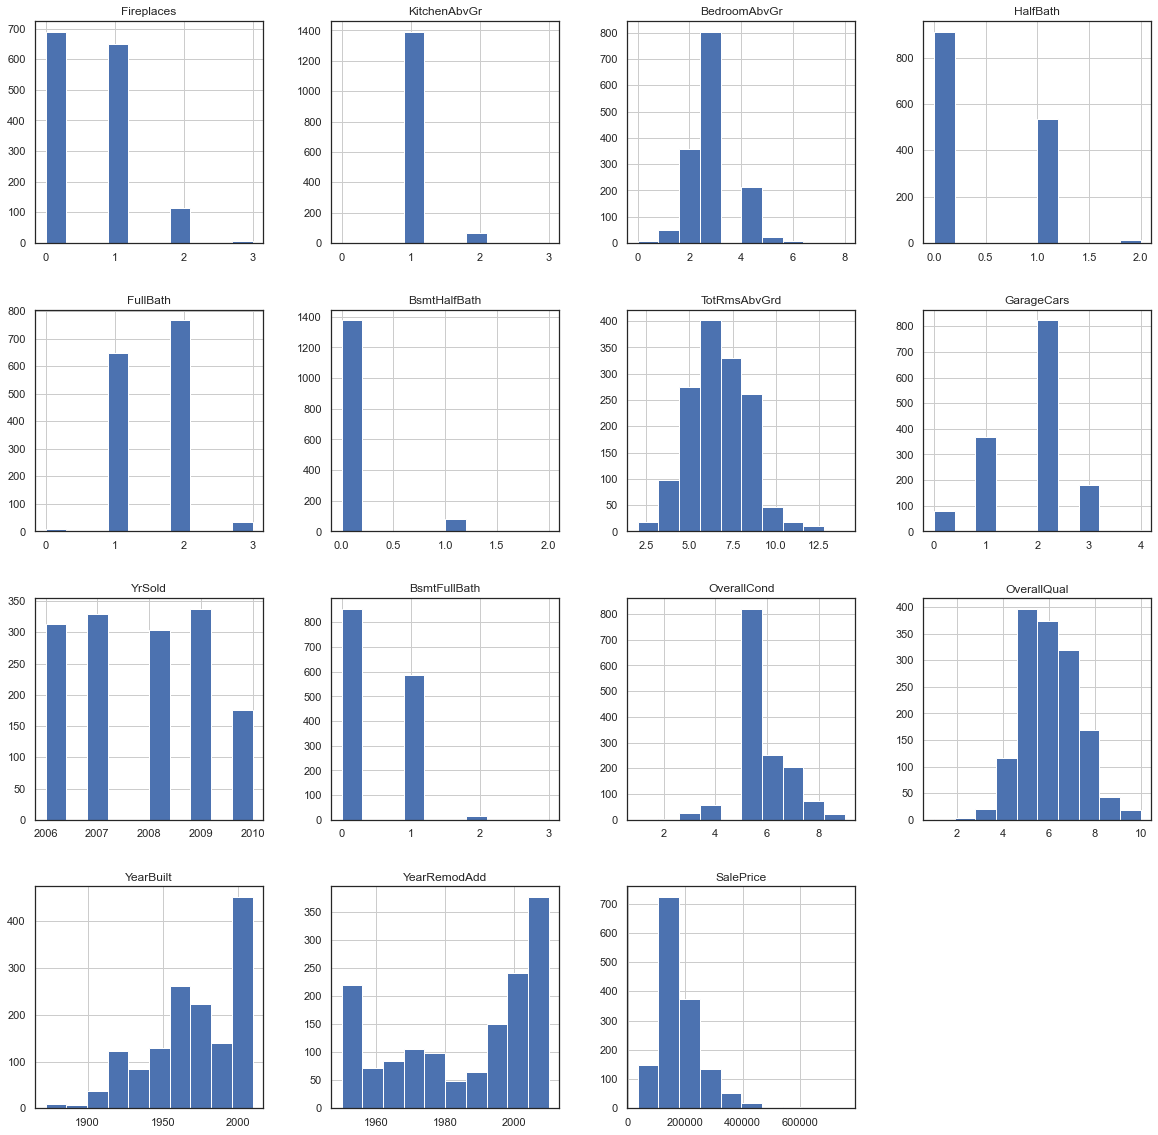

In [18]:
df.hist(edgecolor='white', figsize=(20, 20));

In [19]:
# columns that seem less significant:

df = df.drop(['MasVnrType', 'Street', 'RoofStyle'], axis=1)

In [20]:
# low variability - only a few values differ:

df = df.drop(['KitchenAbvGr', 'BsmtHalfBath','MSZoning', 
              'LandContour', 'LandSlope', 'Condition1', 
              'Condition2', 'BldgType','RoofMatl', 
              'ExterCond'], axis=1)




In [21]:
df.columns

Index(['BsmtExposure', 'BsmtQual', 'Fireplaces', 'KitchenQual', 'BedroomAbvGr',
       'HalfBath', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'YrSold',
       'SaleType', 'SaleCondition', 'BsmtFullBath', 'CentralAir',
       'Neighborhood', 'OverallCond', 'OverallQual', 'HouseStyle', 'LotConfig',
       'LotShape', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation',
       'HeatingQC', 'SalePrice'],
      dtype='object')

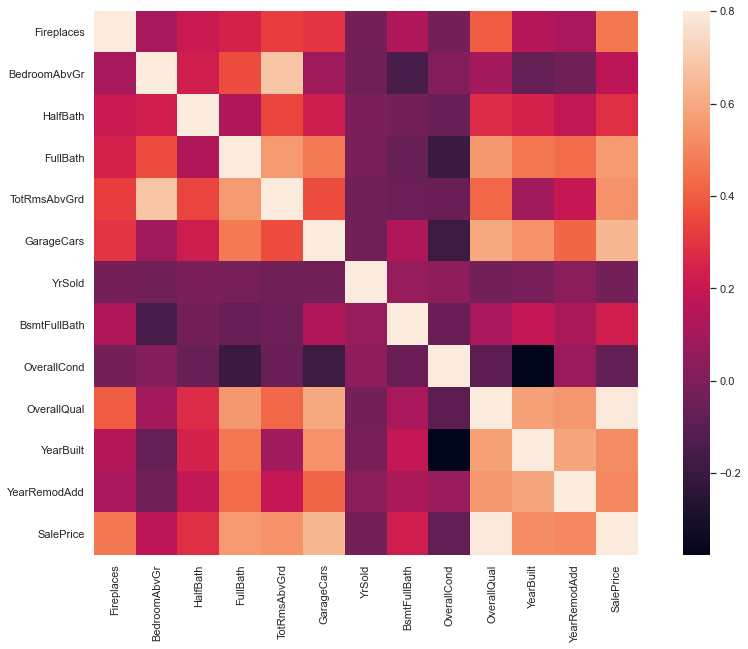

In [24]:
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr_mat, vmax = .8, square = True);

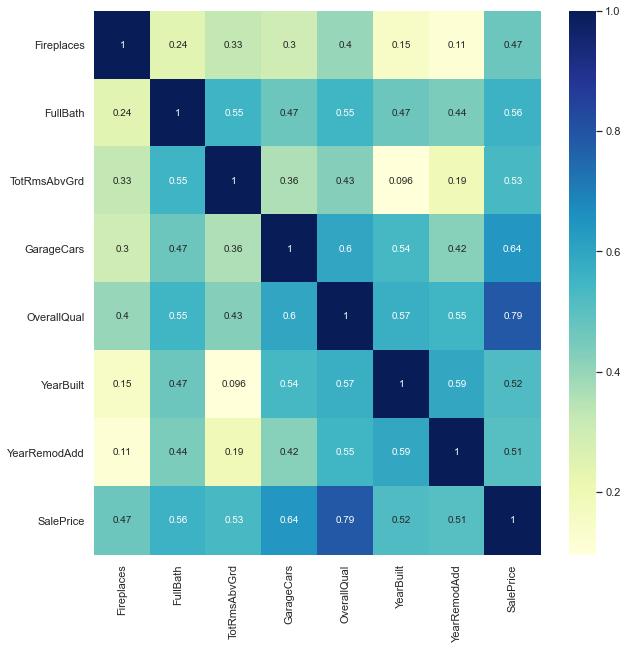

In [23]:
high_corr = df.corr()
high_corr_features = high_corr.index[abs(high_corr["SalePrice"])>0.4]

plt.figure(figsize=(10,10))
mat = sns.heatmap(df[high_corr_features].corr(), annot=True, cmap="YlGnBu")

## Filling NaN values:

In [25]:
df.isnull().sum()

BsmtExposure     38
BsmtQual         37
Fireplaces        0
KitchenQual       0
BedroomAbvGr      0
HalfBath          0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
YrSold            0
SaleType          0
SaleCondition     0
BsmtFullBath      0
CentralAir        0
Neighborhood      0
OverallCond       0
OverallQual       0
HouseStyle        0
LotConfig         0
LotShape          0
YearBuilt         0
YearRemodAdd      0
ExterQual         0
Foundation        0
HeatingQC         0
SalePrice         0
dtype: int64

In [26]:
#filling NaN values with mode (cat var) and mean (num var)

df = fill_na(df)

Number of missing values on your dataset are

BsmtExposure     0
BsmtQual         0
Fireplaces       0
KitchenQual      0
BedroomAbvGr     0
HalfBath         0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
YrSold           0
SaleType         0
SaleCondition    0
BsmtFullBath     0
CentralAir       0
Neighborhood     0
OverallCond      0
OverallQual      0
HouseStyle       0
LotConfig        0
LotShape         0
YearBuilt        0
YearRemodAdd     0
ExterQual        0
Foundation       0
HeatingQC        0
SalePrice        0
dtype: int64


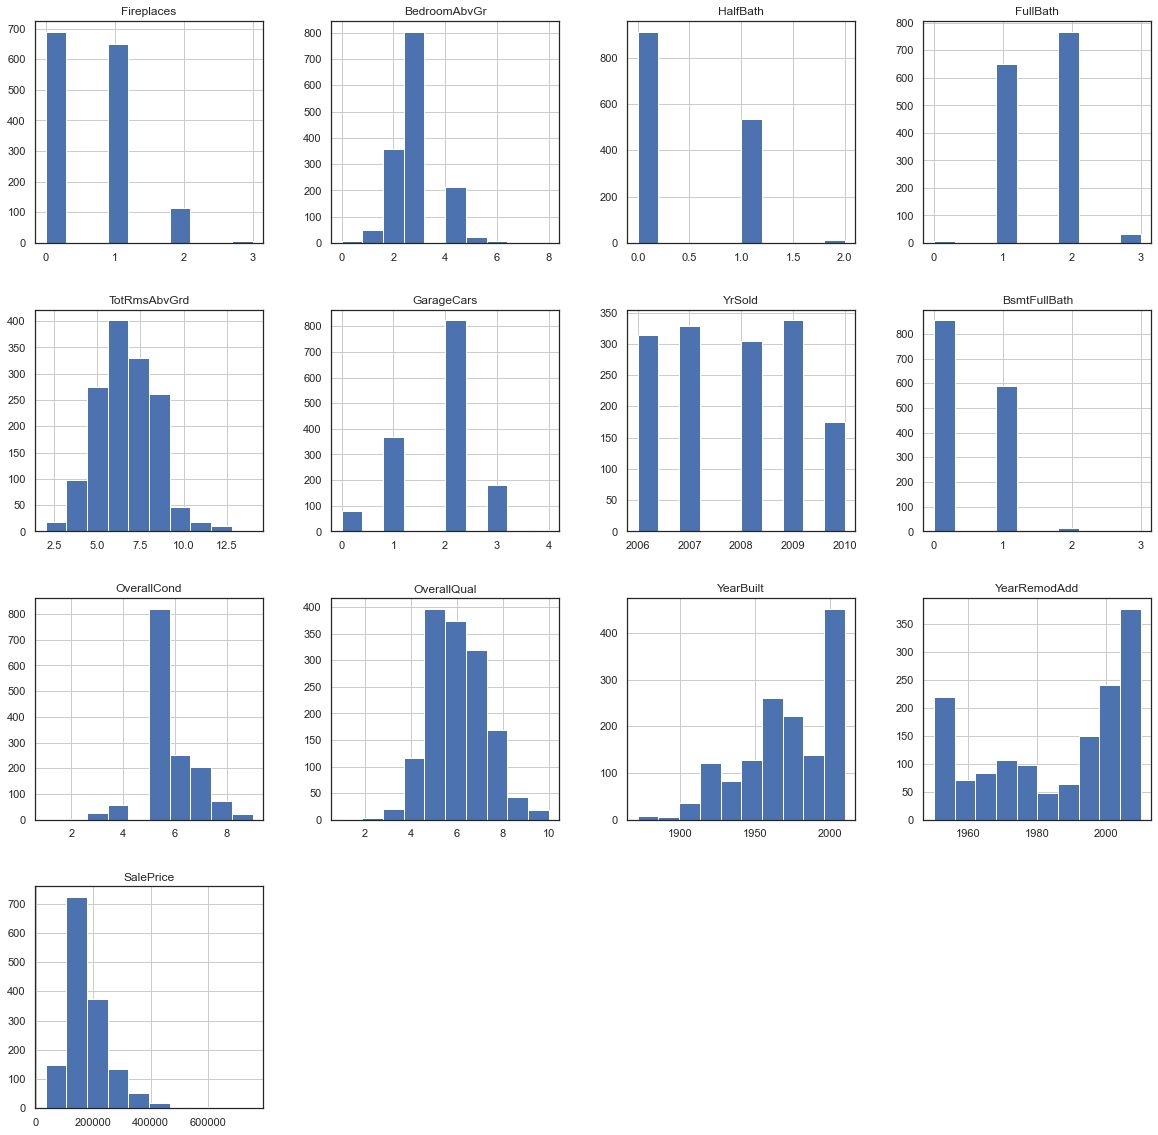

In [27]:
df.hist(edgecolor='white', figsize=(20, 20));

In [28]:
df.shape

(1460, 26)

In [29]:
# dropping more columns - low correlation with SalePrice

df = df.drop(['Neighborhood', 'HalfBath', 'BsmtFullBath', 'BedroomAbvGr', 'LotConfig', 'LotShape'], axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BsmtExposure   1460 non-null   object
 1   BsmtQual       1460 non-null   object
 2   Fireplaces     1460 non-null   int64 
 3   KitchenQual    1460 non-null   object
 4   FullBath       1460 non-null   int64 
 5   TotRmsAbvGrd   1460 non-null   int64 
 6   GarageCars     1460 non-null   int64 
 7   YrSold         1460 non-null   int64 
 8   SaleType       1460 non-null   object
 9   SaleCondition  1460 non-null   object
 10  CentralAir     1460 non-null   object
 11  OverallCond    1460 non-null   int64 
 12  OverallQual    1460 non-null   int64 
 13  HouseStyle     1460 non-null   object
 14  YearBuilt      1460 non-null   int64 
 15  YearRemodAdd   1460 non-null   int64 
 16  ExterQual      1460 non-null   object
 17  Foundation     1460 non-null   object
 18  HeatingQC      1460 non-null

# Data Visualization

## Categorical and Numerical Variables

Dividing variables into Cat and Num and checking how are they correlated with the SalePrice



### Categorical Variables:



In [31]:

categ_var = df.select_dtypes(include=['category', object]).columns

categ_var

Index(['BsmtExposure', 'BsmtQual', 'KitchenQual', 'SaleType', 'SaleCondition',
       'CentralAir', 'HouseStyle', 'ExterQual', 'Foundation', 'HeatingQC'],
      dtype='object')

In [32]:
# filtering the dataset - cat var:

data_cat = df[categ_var]
data_cat.head(15)

BsmtExposure BsmtQual KitchenQual SaleType SaleCondition CentralAir  \
Id                                                                       
1            No       Gd          Gd       WD        Normal          Y   
2            Gd       Gd          TA       WD        Normal          Y   
3            Mn       Gd          Gd       WD        Normal          Y   
4            No       TA          Gd       WD       Abnorml          Y   
5            Av       Gd          Gd       WD        Normal          Y   
6            No       Gd          TA       WD        Normal          Y   
7            Av       Ex          Gd       WD        Normal          Y   
8            Mn       Gd          TA       WD        Normal          Y   
9            No       TA          TA       WD       Abnorml          Y   
10           No       TA          TA       WD        Normal          Y   
11           No       TA          TA       WD        Normal          Y   
12           No       Ex          Ex      New       Partial          Y   
13           No       TA          TA       WD        Normal          Y   
14           Av       Gd          Gd      New       Partial          Y   
15           No       TA          TA       WD        Normal          Y   

   HouseStyle ExterQual Foundation HeatingQC  
Id                                            
1      2Story        Gd      PConc        Ex  
2      1Story        TA     CBlock        Ex  
3      2Story        Gd      PConc        Ex  
4      2Story        TA     BrkTil        Gd  
5      2Story        Gd      PConc        Ex  
6      1.5Fin        TA       Wood        Ex  
7      1Story        Gd      PConc        Ex  
8      2Story        TA     CBlock        Ex  
9      1.5Fin        TA     BrkTil        Gd  
10     1.5Unf        TA     BrkTil        Ex  
11     1Story        TA     CBlock        Ex  
12     2Story        Ex      PConc        Ex  
13     1Story        TA     CBlock        TA  
14     1Story        Gd      PConc        Ex  
15     1Story        TA     CBlock        TA

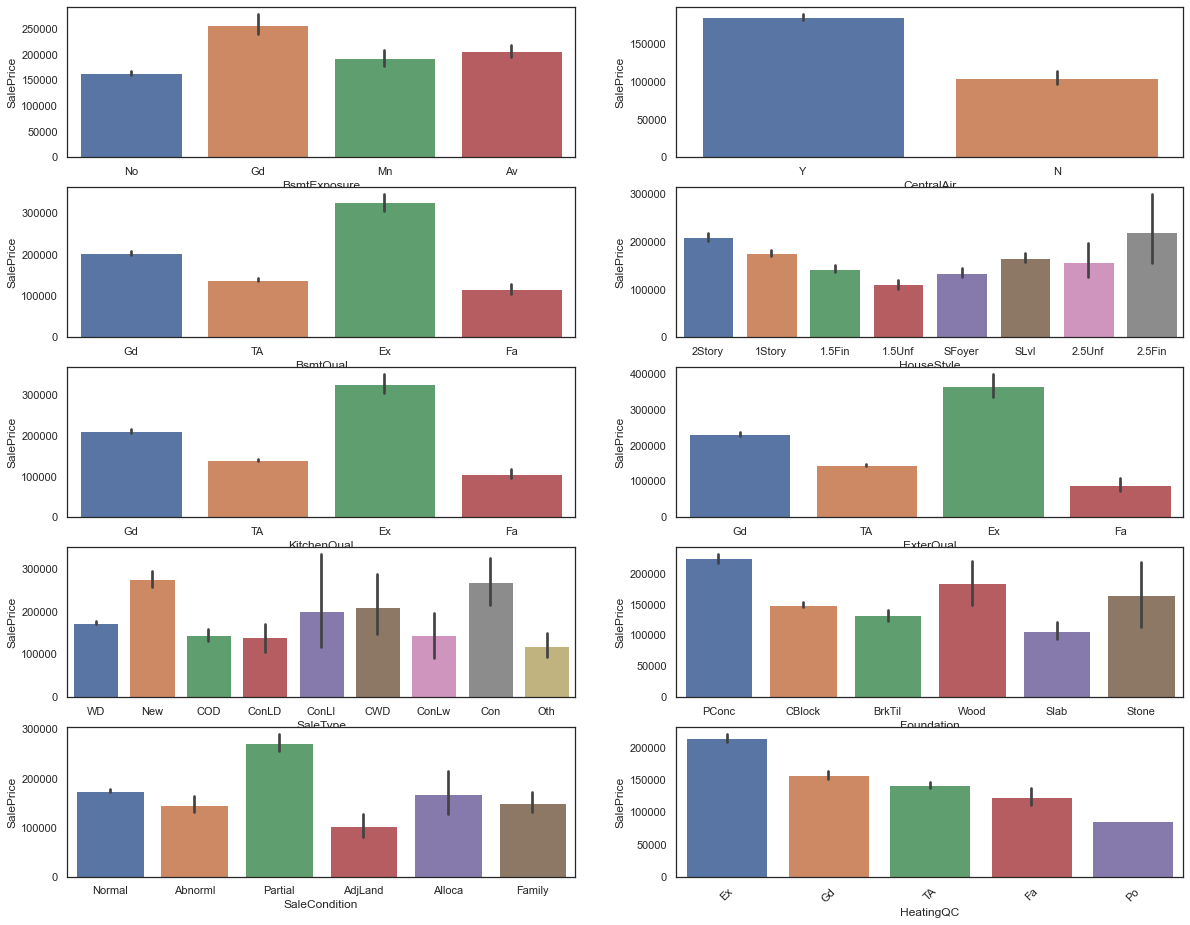

In [33]:
fig, axes = plt.subplots(5,2 , figsize=(20, 16), sharex=False)
for i, feature in enumerate(categ_var):
    sns.barplot(data=df, x = feature, y= "SalePrice",ax=axes[i%5, i//5]) 

plt.xticks(rotation=45);

### Numerical data:

In [34]:
num_var = df.select_dtypes(include=['int', 'float']).columns
num_var

Index(['Fireplaces', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'YrSold',
       'OverallCond', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

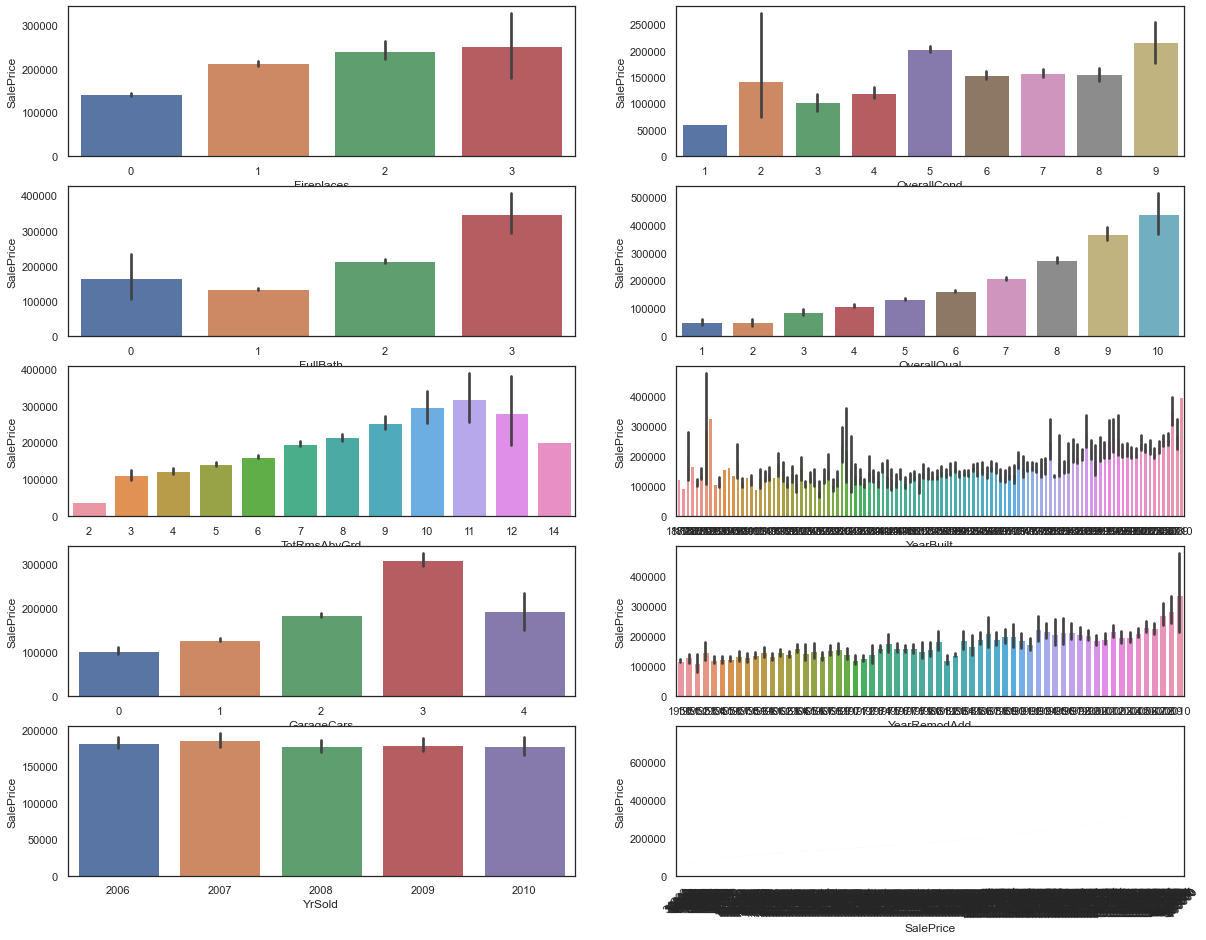

In [35]:
fig, axes = plt.subplots(5,2 , figsize=(20, 16), sharex=False)
for i, feature in enumerate(num_var):
    sns.barplot(data=df, x = feature, y= "SalePrice",ax=axes[i%5, i//5]) 

plt.xticks(rotation=45);

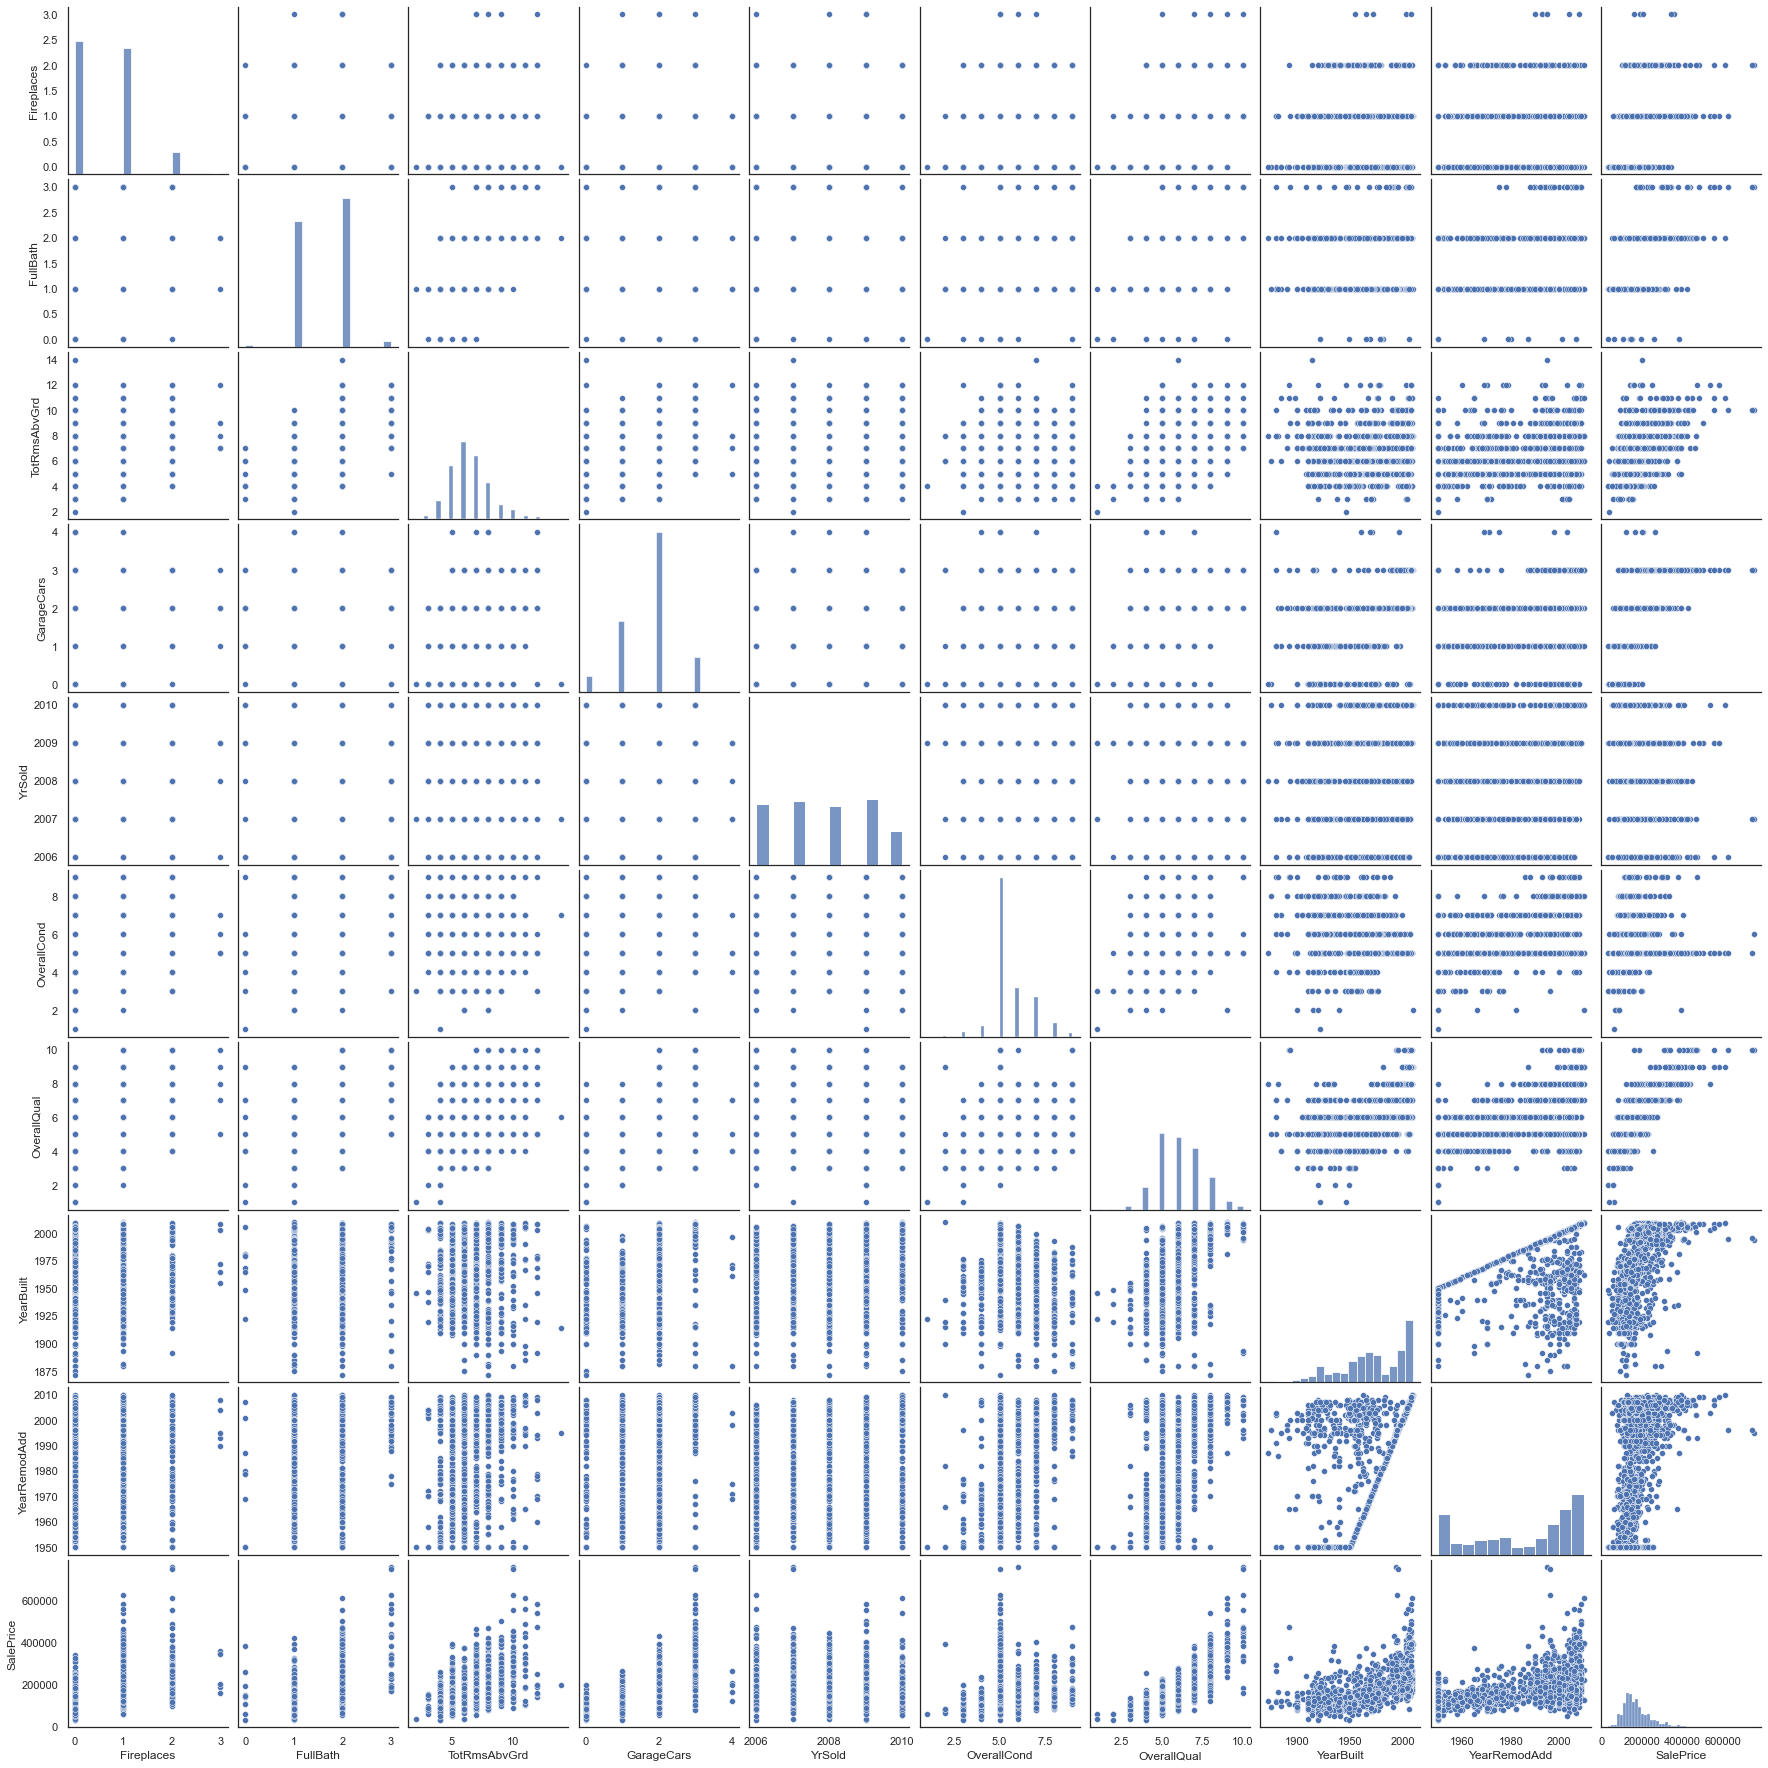

In [36]:
 g = sns.pairplot(df, palette="husl")

In [36]:
df_name = df.columns

## Outliers:

In [37]:
feature_number = np.arange(len(df.columns))
for i in feature_number:
    feat_n = i
    OutLiersBox(df, df_name[i])

It looks that there are no suspicious outliers, the values that are far from the others are still normal, possible values. 
For the purpose of model building, it might be important to remove the 2 furtest points in SalePrice as it might affect it 

In [38]:
df = df[df['SalePrice'] <= 700000] 

df['SalePrice'].max()

625000

In [40]:
# Let's check the correlation matrix once again:

Index(['Fireplaces', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'YrSold',
       'OverallCond', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')


Fireplaces  FullBath  TotRmsAbvGrd  GarageCars    YrSold  \
Fireplaces      1.000000  0.237842      0.321824    0.297417  0.022358   
FullBath        0.237842  1.000000      0.551430    0.466821  0.017559   
TotRmsAbvGrd    0.321824  0.551430      1.000000    0.359240  0.032822   
GarageCars      0.297417  0.466821      0.359240    1.000000  0.037806   
YrSold          0.022358  0.017559      0.032822    0.037806  1.000000   
OverallCond     0.023699  0.194844      0.057574    0.185978  0.043910   
OverallQual     0.391820  0.546040      0.422799    0.598674  0.025113   
YearBuilt       0.145922  0.467843      0.093613    0.537303  0.012964   
YearRemodAdd    0.111435  0.439335      0.190862    0.420318  0.036194   
SalePrice       0.463831  0.557558      0.533410    0.648619  0.023740   

              OverallCond  OverallQual  YearBuilt  YearRemodAdd  SalePrice  
Fireplaces       0.023699     0.391820   0.145922      0.111435   0.463831  
FullBath         0.194844     0.546040   0.467843      0.439335   0.557558  
TotRmsAbvGrd     0.057574     0.422799   0.093613      0.190862   0.533410  
GarageCars       0.185978     0.598674   0.537303      0.420318   0.648619  
YrSold           0.043910     0.025113   0.012964      0.036194   0.023740  
OverallCond      1.000000     0.092188   0.376103      0.073828   0.080113  
OverallQual      0.092188     1.000000   0.572658      0.551811   0.795998  
YearBuilt        0.376103     0.572658   1.000000      0.592658   0.534565  
YearRemodAdd     0.073828     0.551811   0.592658      1.000000   0.520809  
SalePrice        0.080113     0.795998   0.534565      0.520809   1.000000

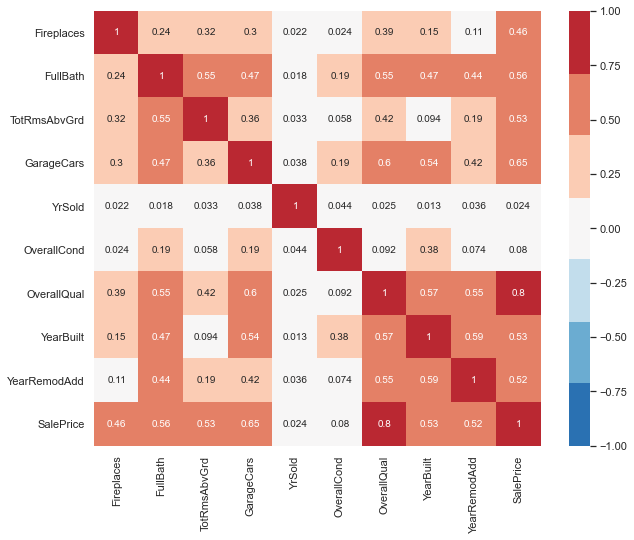

In [39]:
corrCoef_Threshold(df, False)

- The Variables that are quite highly correlated with our target variable:
    - OverallQual
    - GarageCars

- The variables that have the lowest correlation: 
    - YrSold 
    - OverallCond. 
    
Before we drop the ones with the lowest correlation, let's check if YrSold can give us any important information.

## EDA of YEAR variables

Values that are related to years: YrSold, YearBuilt and YearRemodAdd

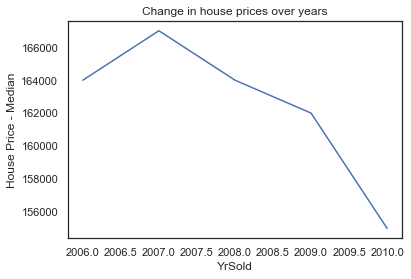

In [40]:
#YrSold:

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('House Price - Median')
plt.title('Change in house prices over years');

We can observe that the prices decrease in 2008-2010, they are significantly lower than e.g. in 2006

Let's see the other 2 variables:

Text(0, 0.5, 'House Price - Median')

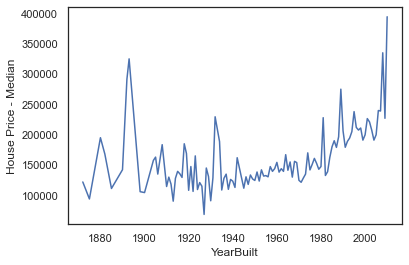

In [41]:
#YearBuilt:

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('House Price - Median')


We can notice that the older the house, the cheaper it is, with an exception of some houses from the period of 1890-1900. 

There was also a peek around 1930s

Text(0, 0.5, 'House Price - Median')

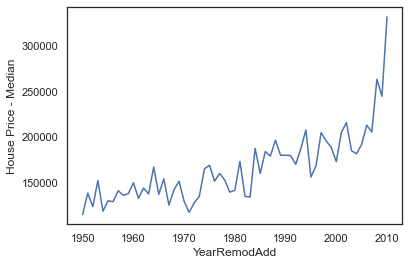

In [42]:
#YearRemodAdd:

data.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.ylabel('House Price - Median')


In this case, the relation with the SalePrice is more linear than in previous cases. 
We can notice that the houses that were recently renovated have higher value.

In [43]:
#Let's drop the YrBuild and OverallCond then:

df = df.drop(['YrSold', 'OverallCond'], axis = 1)

In [44]:
df.columns

Index(['BsmtExposure', 'BsmtQual', 'Fireplaces', 'KitchenQual', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'SaleType', 'SaleCondition', 'CentralAir',
       'OverallQual', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'Foundation', 'HeatingQC', 'SalePrice'],
      dtype='object')

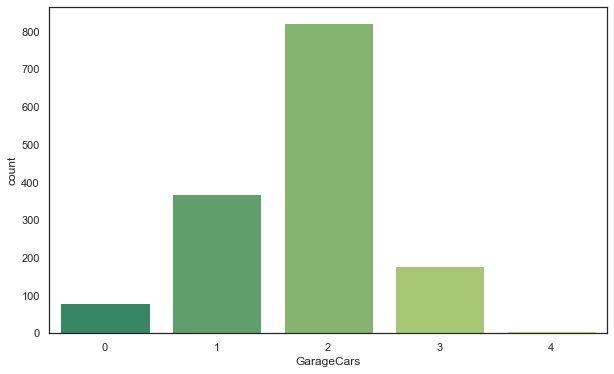

In [46]:
# GarageCars: 

plt.figure(figsize=(10,6))
sns.countplot(x='GarageCars', data=df, palette='summer');


We can notice that the majority of the houses have space for 2 cars and only a few for 4

# Encoding the categorical variables:

After some exploration of the categorical variables, I decided to encode them in the following way:

> 'HeatingQC','ExterQual','KitchenQual','BsmtQual', 'CentralAir', 'BsmtExposure' **--> Replace Map**

> 'SaleType', 'SaleCondition', 'HouseStyle', 'Foundation' **--> LabelEncoder**

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement    
       
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor 
       
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure(split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement 

CentralAir: Central air conditioning

       N	No
       Y	Yes
       


In [47]:
#Using a replace map to encode some of the variables:
replace_map = {'HeatingQC': {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'ExterQual': {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'KitchenQual': {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            'BsmtQual': {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            'BsmtExposure': {'Gd':5, 'Av':4, 'Mn':3, 'No':2, 'NA':1},
            'CentralAir': {'N': 0, 'Y': 1}
    
}

df = df.replace(replace_map)
df.head()

BsmtExposure  BsmtQual  Fireplaces  KitchenQual  FullBath  TotRmsAbvGrd  \
Id                                                                            
1              2         4           0            4         2             8   
2              5         4           1            3         2             6   
3              3         4           1            4         2             6   
4              2         3           1            4         1             7   
5              4         4           1            4         2             9   

    GarageCars SaleType SaleCondition  CentralAir  OverallQual HouseStyle  \
Id                                                                          
1            2       WD        Normal           1            7     2Story   
2            2       WD        Normal           1            6     1Story   
3            2       WD        Normal           1            7     2Story   
4            3       WD       Abnorml           1            7     2Story   
5            3       WD        Normal           1            8     2Story   

    YearBuilt  YearRemodAdd  ExterQual Foundation  HeatingQC  SalePrice  
Id                                                                       
1        2003          2003          4      PConc          5     208500  
2        1976          1976          3     CBlock          5     181500  
3        2001          2002          4      PConc          5     223500  
4        1915          1970          3     BrkTil          4     140000  
5        2000          2000          4      PConc          5     250000

In [50]:
# For the remaining variables we can use a label encoder as they don't seem to have any order or rank

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab  	Slab
       Stone	Stone
       Wood	    Wood
       
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	    Split Level       
                 
SaleType: Type of sale
		
       WD 	    Warranty Deed - Conventional
       CWD	    Warranty Deed - Cash
       VWD	    Warranty Deed - VA Loan
       New	    Home just constructed and sold
       COD	    Court Officer Deed/Estate
       Con	    Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	    Other
       
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [48]:
df2 = df.copy()

In [49]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder() 

df2['Foundation_cat'] = lb_make.fit_transform(df2['Foundation'])

df2['HouseStyle_cat'] = lb_make.fit_transform(df2['HouseStyle'])

df2['SaleType_cat'] = lb_make.fit_transform(df2['SaleType'])

df2['SaleCondition_cat'] = lb_make.fit_transform(df2['SaleCondition'])

#dropping the cat columns:
df2 = df2.drop(['Foundation', 'HouseStyle', 'SaleType', 'SaleCondition'], axis = 1)

df2.head() 



BsmtExposure  BsmtQual  Fireplaces  KitchenQual  FullBath  TotRmsAbvGrd  \
Id                                                                            
1              2         4           0            4         2             8   
2              5         4           1            3         2             6   
3              3         4           1            4         2             6   
4              2         3           1            4         1             7   
5              4         4           1            4         2             9   

    GarageCars  CentralAir  OverallQual  YearBuilt  YearRemodAdd  ExterQual  \
Id                                                                            
1            2           1            7       2003          2003          4   
2            2           1            6       1976          1976          3   
3            2           1            7       2001          2002          4   
4            3           1            7       1915          1970          3   
5            3           1            8       2000          2000          4   

    HeatingQC  SalePrice  Foundation_cat  HouseStyle_cat  SaleType_cat  \
Id                                                                       
1           5     208500               2               5             8   
2           5     181500               1               2             8   
3           5     223500               2               5             8   
4           4     140000               0               5             8   
5           5     250000               2               5             8   

    SaleCondition_cat  
Id                     
1                   4  
2                   4  
3                   4  
4                   0  
5                   4

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BsmtExposure       1458 non-null   int64
 1   BsmtQual           1458 non-null   int64
 2   Fireplaces         1458 non-null   int64
 3   KitchenQual        1458 non-null   int64
 4   FullBath           1458 non-null   int64
 5   TotRmsAbvGrd       1458 non-null   int64
 6   GarageCars         1458 non-null   int64
 7   CentralAir         1458 non-null   int64
 8   OverallQual        1458 non-null   int64
 9   YearBuilt          1458 non-null   int64
 10  YearRemodAdd       1458 non-null   int64
 11  ExterQual          1458 non-null   int64
 12  HeatingQC          1458 non-null   int64
 13  SalePrice          1458 non-null   int64
 14  Foundation_cat     1458 non-null   int64
 15  HouseStyle_cat     1458 non-null   int64
 16  SaleType_cat       1458 non-null   int64
 17  SaleCondition_

Index(['BsmtExposure', 'BsmtQual', 'Fireplaces', 'KitchenQual', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'CentralAir', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'HeatingQC', 'SalePrice'],
      dtype='object')


BsmtExposure  BsmtQual  Fireplaces  KitchenQual  FullBath  \
BsmtExposure      1.000000  0.330931    0.174498     0.239228  0.099307   
BsmtQual          0.330931  1.000000    0.232378     0.571168  0.487592   
Fireplaces        0.174498  0.232378    1.000000     0.251453  0.237842   
KitchenQual       0.239228  0.571168    0.251453     1.000000  0.430118   
FullBath          0.099307  0.487592    0.237842     0.430118  1.000000   
TotRmsAbvGrd      0.020435  0.225783    0.321824     0.282550  0.551430   
GarageCars        0.245109  0.524122    0.297417     0.507431  0.466821   
CentralAir        0.102084  0.215734    0.186131     0.257922  0.108897   
OverallQual       0.268433  0.664827    0.391820     0.670627  0.546040   
YearBuilt         0.285186  0.724825    0.145922     0.529802  0.467843   
YearRemodAdd      0.206518  0.570743    0.111435     0.626009  0.439335   
ExterQual         0.234603  0.646797    0.245185     0.714856  0.480784   
HeatingQC         0.134254  0.422656    0.127533     0.503500  0.332043   
SalePrice         0.358015  0.654755    0.463831     0.663561  0.557558   

              TotRmsAbvGrd  GarageCars  CentralAir  OverallQual  YearBuilt  \
BsmtExposure      0.020435    0.245109    0.102084     0.268433   0.285186   
BsmtQual          0.225783    0.524122    0.215734     0.664827   0.724825   
Fireplaces        0.321824    0.297417    0.186131     0.391820   0.145922   
KitchenQual       0.282550    0.507431    0.257922     0.670627   0.529802   
FullBath          0.551430    0.466821    0.108897     0.546040   0.467843   
TotRmsAbvGrd      1.000000    0.359240    0.033842     0.422799   0.093613   
GarageCars        0.359240    1.000000    0.233576     0.598674   0.537303   
CentralAir        0.033842    0.233576    1.000000     0.272522   0.381727   
OverallQual       0.422799    0.598674    0.272522     1.000000   0.572658   
YearBuilt         0.093613    0.537303    0.381727     0.572658   1.000000   
YearRemodAdd      0.190862    0.420318    0.298760     0.551811   0.592658   
ExterQual         0.294074    0.524620    0.206057     0.725012   0.598211   
HeatingQC         0.162887    0.324112    0.306153     0.456379   0.448329   
SalePrice         0.533410    0.648619    0.258000     0.795998   0.534565   

              YearRemodAdd  ExterQual  HeatingQC  SalePrice  
BsmtExposure      0.206518   0.234603   0.134254   0.358015  
BsmtQual          0.570743   0.646797   0.422656   0.654755  
Fireplaces        0.111435   0.245185   0.127533   0.463831  
KitchenQual       0.626009   0.714856   0.503500   0.663561  
FullBath          0.439335   0.480784   0.332043   0.557558  
TotRmsAbvGrd      0.190862   0.294074   0.162887   0.533410  
GarageCars        0.420318   0.524620   0.324112   0.648619  
CentralAir        0.298760   0.206057   0.306153   0.258000  
OverallQual       0.551811   0.725012   0.456379   0.795998  
YearBuilt         0.592658   0.598211   0.448329   0.534565  
YearRemodAdd      1.000000   0.587895   0.549787   0.520809  
ExterQual         0.587895   1.000000   0.519548   0.690460  
HeatingQC         0.549787   0.519548   1.000000   0.434708  
SalePrice         0.520809   0.690460   0.434708   1.000000

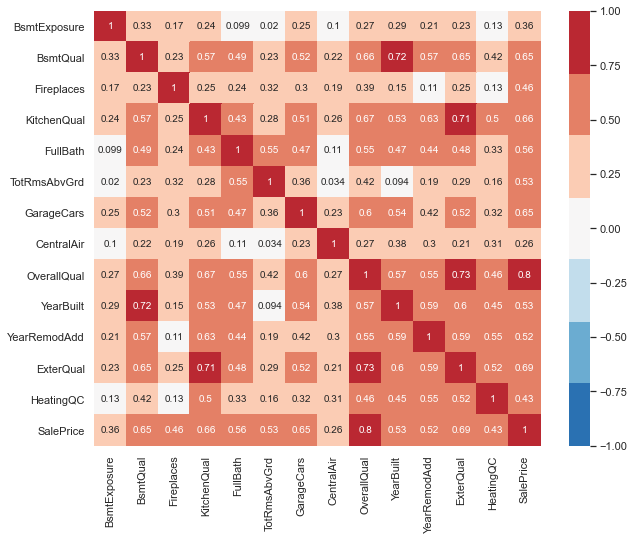

In [51]:
#Let's check the correlation matrix of the clean data (df2):

corrCoef_Threshold(df, False)

BsmtExposure and CentralAir seem to have very low correlation with the target variable.

# Feature Importance

Let's check what is the *importance* of each feature by creating a **RandomForest**:


In [52]:
# Let's make train-validation and test data sets.

X = df2.drop('SalePrice', axis=1) 
y = df2.SalePrice

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=42)
 

In [53]:
y_train.value_counts()

140000    11
110000    10
160000    10
190000    10
135000    10
185000     9
155000     9
145000     8
144000     8
180000     8
139000     7
173000     7
215000     7
125000     7
170000     7
235000     7
100000     7
147000     6
130000     6
250000     6
141000     6
148000     6
143000     6
128000     6
176000     6
127000     6
129000     6
230000     6
177000     5
108000     5
132500     5
154000     5
118000     5
174000     5
290000     5
165000     5
157000     5
200000     5
124000     5
119000     5
115000     5
151000     4
163000     4
142000     4
132000     4
137000     4
156000     4
87000      4
175000     4
220000     4
158000     4
127500     4
133000     4
162000     4
214000     4
189000     4
181000     4
80000      4
112000     4
117000     4
105000     4
152000     4
120500     4
167000     4
187500     4
122000     4
210000     4
88000      4
201000     3
315000     3
232000     3
120000     3
320000     3
138000     3
169000     3
109500     3
225000     3

In [54]:
from sklearn.ensemble import RandomForestRegressor 

In [55]:
clf = RandomForestRegressor(n_estimators=550,random_state=42) 
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=550, random_state=42)

In [56]:
clf
clf.feature_importances_ 

array([0.02659505, 0.03386342, 0.02668387, 0.01223184, 0.02431684,
       0.07096356, 0.05762188, 0.00532833, 0.61253928, 0.04197198,
       0.03908768, 0.01204054, 0.00680212, 0.00347799, 0.01166254,
       0.00458901, 0.01022408])

In [57]:
feature_importance = clf.feature_importances_ 
print(feature_importance)

[0.02659505 0.03386342 0.02668387 0.01223184 0.02431684 0.07096356
 0.05762188 0.00532833 0.61253928 0.04197198 0.03908768 0.01204054
 0.00680212 0.00347799 0.01166254 0.00458901 0.01022408]


In [58]:
 # make importances relative to max importance
    
feature_importance = 100.0 * (feature_importance / feature_importance.max()) 
feature_importance

array([  4.34177128,   5.52836677,   4.35627167,   1.99690737,
         3.96984169,  11.58514499,   9.40704989,   0.86987485,
       100.        ,   6.8521294 ,   6.38125235,   1.96567564,
         1.11047852,   0.56779792,   1.90396661,   0.74917772,
         1.66913082])

In [59]:
sorted_idx = np.argsort(feature_importance)
print(sorted_idx) 
print(feature_importance)

[13 15  7 12 16 14 11  3  4  0  2  1 10  9  6  5  8]
[  4.34177128   5.52836677   4.35627167   1.99690737   3.96984169
  11.58514499   9.40704989   0.86987485 100.           6.8521294
   6.38125235   1.96567564   1.11047852   0.56779792   1.90396661
   0.74917772   1.66913082]


In [60]:
pos = np.arange(sorted_idx.shape[0]) 
pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

## Plotting feature importance:

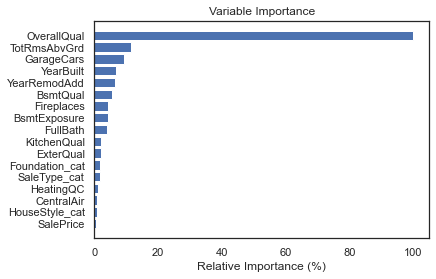

In [61]:
plt.barh(pos, feature_importance[sorted_idx], align='center') 
plt.yticks(pos, df2.columns[sorted_idx])
plt.xlabel('Relative Importance (%)')
plt.title('Variable Importance')
plt.show()

Let's choose the most important features for creating the model:

In [62]:
df_features = df2[['OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'Fireplaces', 'BsmtExposure', 'FullBath', 'KitchenQual', 'SalePrice']]

In [63]:
df_features.head()

OverallQual  TotRmsAbvGrd  GarageCars  YearBuilt  YearRemodAdd  BsmtQual  \
Id                                                                             
1             7             8           2       2003          2003         4   
2             6             6           2       1976          1976         4   
3             7             6           2       2001          2002         4   
4             7             7           3       1915          1970         3   
5             8             9           3       2000          2000         4   

    Fireplaces  BsmtExposure  FullBath  KitchenQual  SalePrice  
Id                                                              
1            0             2         2            4     208500  
2            1             5         2            3     181500  
3            1             3         2            4     223500  
4            1             2         1            4     140000  
5            1             4         2            4     250000

In [64]:
df_features.to_csv('../../datasets/3.0.1Filtered_Houses.csv')